In [1]:
%pylab inline
import pandas as pd
from scipy.sparse.linalg import eigsh
import seaborn as sns
from sklearn.cluster import SpectralClustering
#aopjdsiofd

Populating the interactive namespace from numpy and matplotlib


In [2]:
sub_news = pd.read_csv('sub_news.csv', delimiter=',')
sub_news = sub_news.set_index('IDLink')
sub_ts = pd.read_csv('sub_ts.csv', delimiter=',')
sub_ts = sub_ts.set_index('IDLink')
sub_ts = log(sub_ts+1)

sub_ts.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
IDLink,,,,,,,,,,,,,,,,,,,,,
1516.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.332205,3.332205,3.332205,3.332205,3.332205,3.332205,3.332205,3.332205,3.332205,3.332205
23447.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.330733,4.330733,4.330733,4.330733,4.330733,4.330733,4.330733,4.330733,4.330733,4.330733
47693.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.147494,5.147494,5.147494,5.147494,5.147494,5.147494,5.147494,5.153292,5.220356,5.220356
22241.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.944439,2.944439,2.944439,2.944439,2.944439,2.944439,2.944439,2.944439,2.944439,2.944439
4304.0,0.0,0.693147,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,...,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612


In [3]:
class Feature:
    def __init__(self, df):
        self.data = df
    def feature(self):
        self.output = pd.DataFrame(index = self.data.index, columns=['maximum','esssup','speed','t_speed'])
        self.output.maximum = self.data.max(1)
        self.output.esssup = self.data.idxmax(1).astype(int)
        self.output.speed = log(self.data+10).diff(periods = 10, axis = 1).max(1)
        self.output.t_speed = log(self.data+10).diff(periods = 10, axis = 1).idxmax(1).astype(int)
        
Feature_ts = Feature(sub_ts)
Feature_ts.feature()
ts_feature = Feature_ts.output


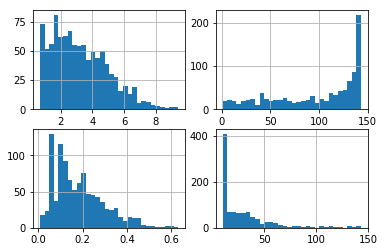

In [4]:
subplot(2,2,1)
ts_feature.maximum.hist(bins=30);
subplot(2,2,2)
ts_feature.esssup.hist(bins=30);
subplot(2,2,3)
ts_feature.speed.hist(bins=30);
subplot(2,2,4)
ts_feature.t_speed.hist(bins=30);



In [5]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(ts_feature.iloc[:,:4])
Cpred = gmm.predict(ts_feature.iloc[:,:4])

ts_feature["group"] = [['group0','group1'][i]  for i in Cpred]
#ts_feature["Cpred"] = ts_feature["Cpred"].astype(object)
ts_feature.head()

,maximum,esssup,speed,t_speed,group
IDLink,,,,,
1516.0,3.332205,111,0.272733,53,group0
23447.0,4.330733,116,0.317557,21,group0
47693.0,5.220356,142,0.201711,45,group1
22241.0,2.944439,125,0.082215,43,group1
4304.0,1.098612,2,0.104235,10,group0


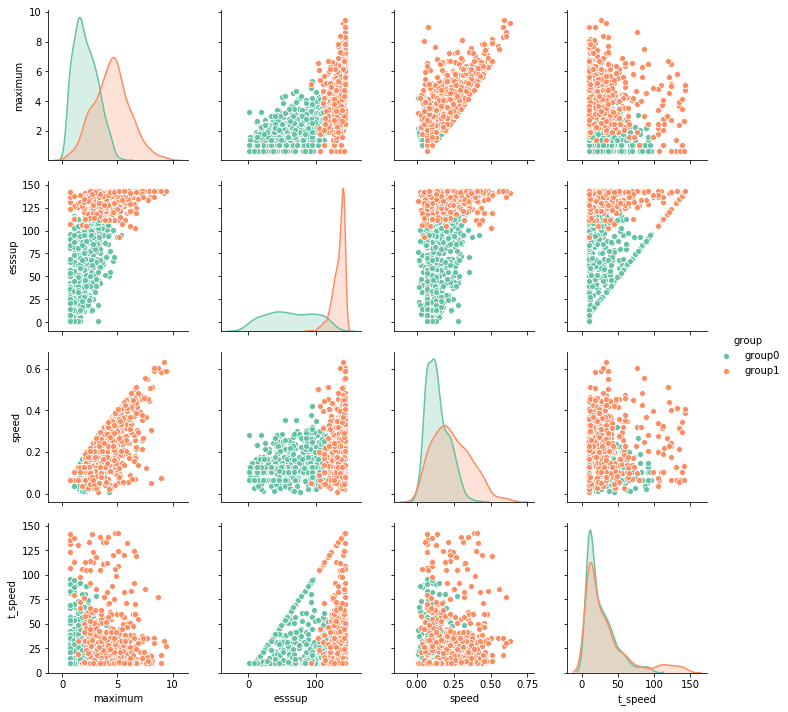

In [7]:
g = sns.pairplot(ts_feature, hue="group", palette="Set2", diag_kind="kde", height=2.5)
g.savefig("FatureDistri.png")

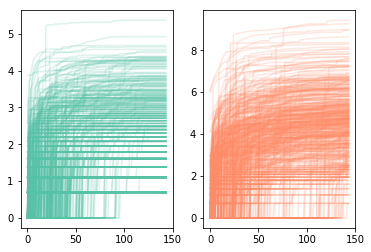

In [8]:
for k in range(2):
    subplot(1,2,k+1)
    temp = sub_ts.values[Cpred== k,:]
    for i in range( temp.shape[0]):
        plt.plot(temp[i,:],c=['#56c2a6','#ff8c67'][k],alpha=0.2);

savefig('ts_labeled.png')

# cluster and feature output

In [9]:
ts_feature.columns = 'y_' + ts_feature.columns
ts_feature.head()

,y_maximum,y_esssup,y_speed,y_t_speed,y_group
IDLink,,,,,
1516.0,3.332205,111,0.272733,53,group0
23447.0,4.330733,116,0.317557,21,group0
47693.0,5.220356,142,0.201711,45,group1
22241.0,2.944439,125,0.082215,43,group1
4304.0,1.098612,2,0.104235,10,group0


In [10]:
sub_news.shape

(1000, 10)

In [11]:
sub_news = pd.merge(sub_news, ts_feature, on='IDLink')
print(sub_news.shape)
print(ts_feature.shape)

(1000, 15)
(1000, 5)


In [12]:
gmm = GaussianMixture(n_components=2)
gmm.fit(ts_feature.values)
sub_news['early10'] = sub_ts.iloc[:,:10].max(1)
sub_news['early20'] = sub_ts.iloc[:,:20].max(1)
sub_news['final label'] = gmm.predict(ts_feature.values)



sub_news.head()

ValueError: could not convert string to float: 'group1'

In [ ]:
#sub_news.to_csv('sub_news_withy.csv')